In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [12]:
iris_df=pd.read_csv('C:\\Users\\sahas\\Downloads\\archive.zip')

In [14]:
iris_df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris_df.shape


(150, 6)

In [18]:
#checking the basic info
iris_df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [19]:
#checking the statistical summary
iris_df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
#checking the null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
print("unique number of values in dataset species:",iris_df["Species"].nunique())
print("unique species in iris dataset:",iris_df["Species"].unique())

unique number of values in dataset species: 3
unique species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


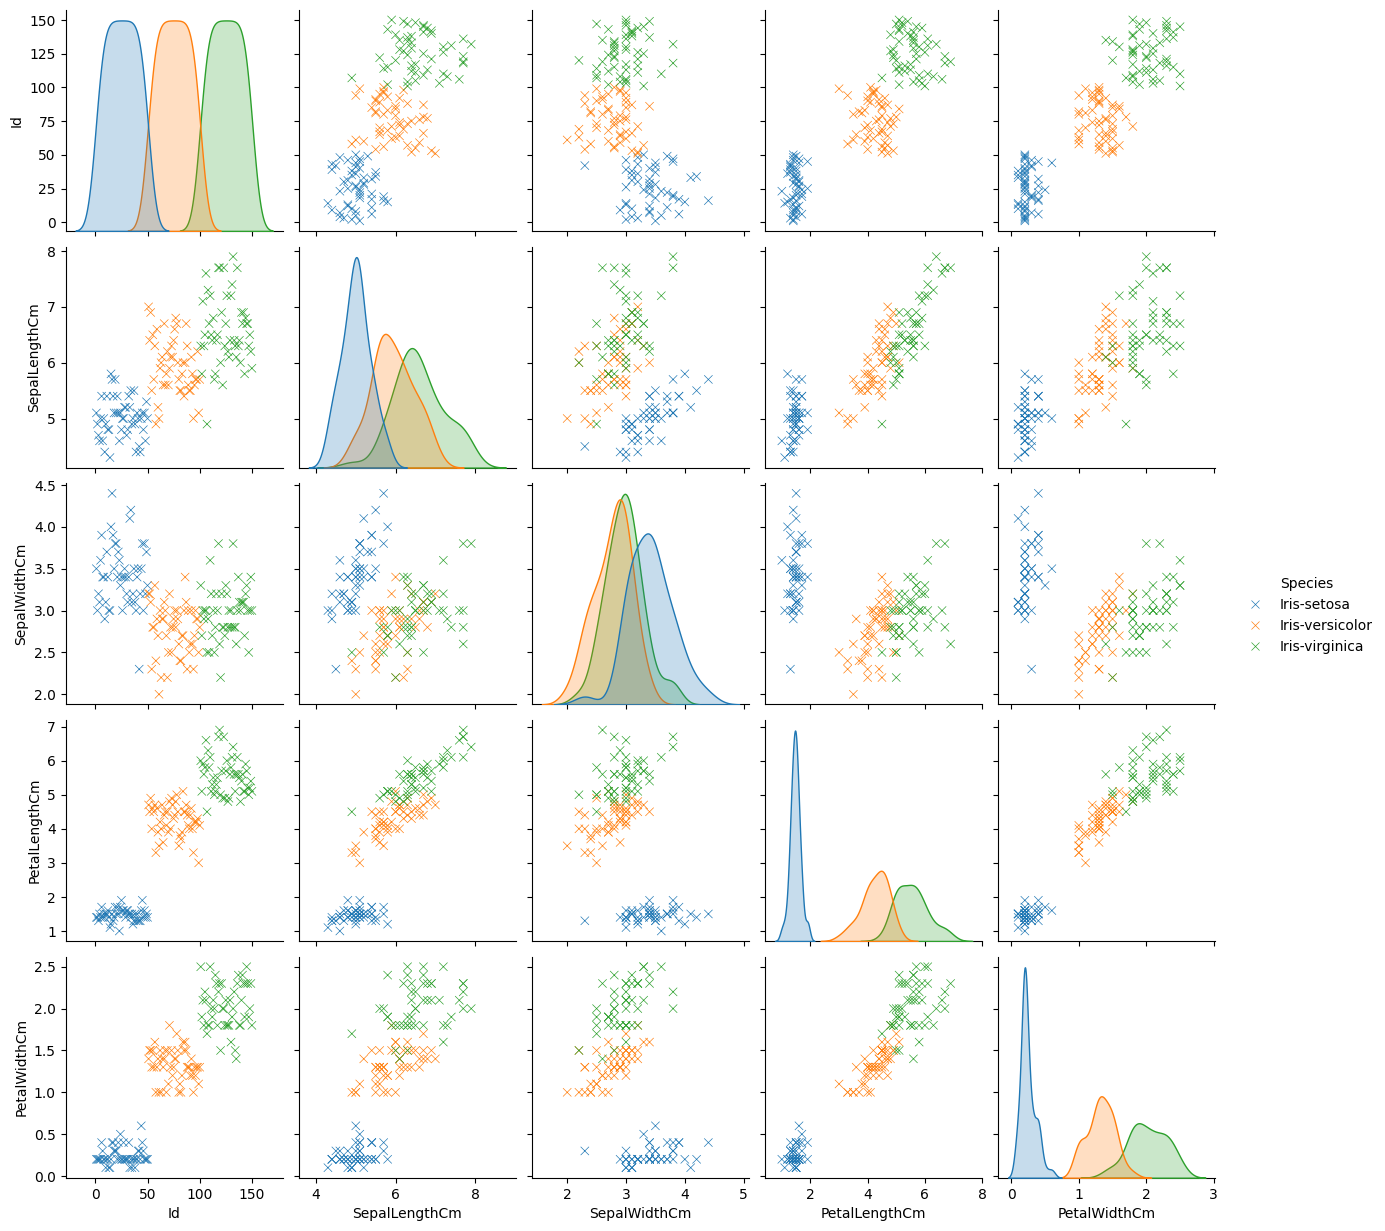

In [29]:
#data visualization
sns.pairplot(iris_df,hue="Species",markers="x")
plt.show()

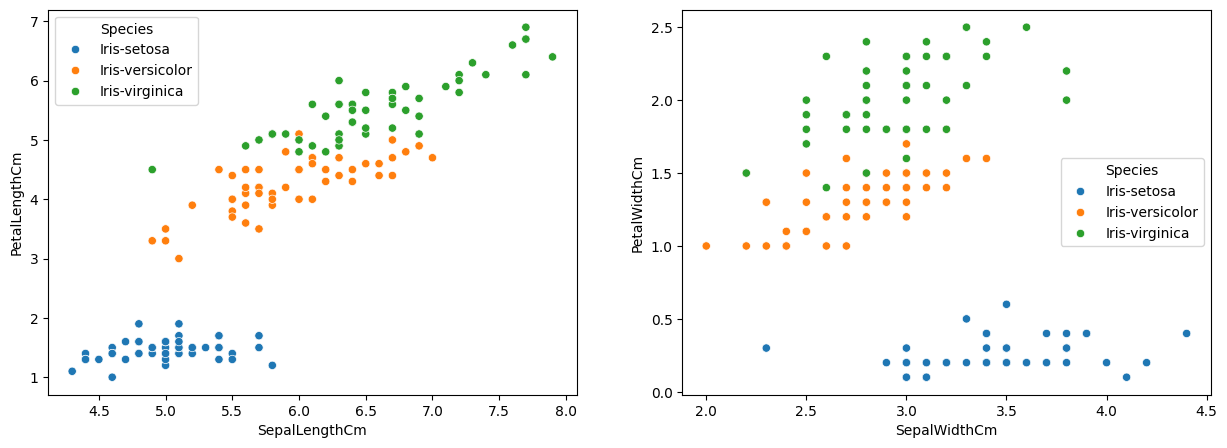

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm' ,y='PetalLengthCm' ,data=iris_df,hue='Species')

plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=iris_df,hue='Species')

plt.show()



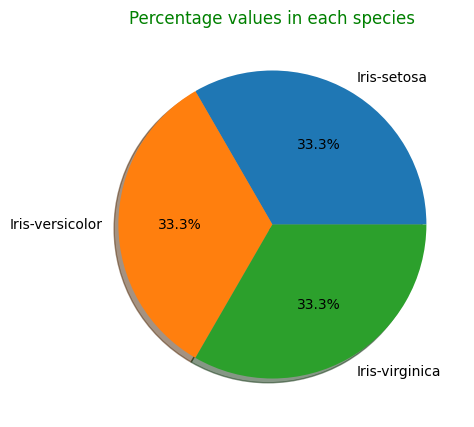

In [45]:
#checking value counts
iris_df["Species"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,figsize=(5,5))
plt.title("Percentage values in each species",fontsize=12,c="g")
plt.ylabel("",fontsize=10,c="r")
plt.show()


In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

iris_df["Species"]=le.fit_transform(iris_df["Species"])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [65]:
iris_df['Species'].unique()

array([0, 1, 2])

In [66]:
X=iris_df.iloc[:,[0,1,2,3]]
X.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0      1            5.1           3.5            1.4
1      2            4.9           3.0            1.4
2      3            4.7           3.2            1.3
3      4            4.6           3.1            1.5
4      5            5.0           3.6            1.4
..   ...            ...           ...            ...
145  146            6.7           3.0            5.2
146  147            6.3           2.5            5.0
147  148            6.5           3.0            5.2
148  149            6.2           3.4            5.4
149  150            5.9           3.0            5.1

[150 rows x 4 columns]>

In [67]:
y=iris_df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [70]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [71]:
#split data into training and testingset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [76]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic Regression successfully implemented")

y_pred=lr.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test, y_pred)

print("confusion matrix:")
print(cm)

accuracy= accuracy_score(y_test, y_pred)

print("accuracy is:-",accuracy*100)

print("classification_report:")
print(classification_report(y_test, y_pred))

Logistic Regression successfully implemented
confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(X_train, y_train)
print("RandomForestClassifier successfully implemented")

y_pred=rfc.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

accuracy= accuracy_score(y_test, y_pred)

print("accuracy is:-",accuracy*100)

print("classification_report:")
print(classification_report(y_test, y_pred))

RandomForestClassifier successfully implemented
confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree=RandomForestClassifier()

dtree.fit(X_train, y_train)
print("DecisonTreeAlgorithm successfully implemented")

y_pred=dtree.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

accuracy= accuracy_score(y_test, y_pred)

print("accuracy is:-",accuracy*100)

print("classification_report:")
print(classification_report(y_test, y_pred))

DecisonTreeAlgorithm successfully implemented
confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [91]:
#support vector machine
from sklearn.svm import SVC
svc=SVC()

svc.fit(X_train, y_train)
print("SupportVectorClassifier successfully implemented")

y_pred=svc.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

accuracy= accuracy_score(y_test, y_pred)

print("accuracy is:-",accuracy*100)

print("classification_report:")
print(classification_report(y_test, y_pred))

SupportVectorClassifier successfully implemented
confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

